In [1]:
import pandas as pd
import numpy as np

SciANN_df = pd.read_csv('SciANN_collected_info_varying_CollocationPoints.csv')
SciANN_df['Tag'] = 'SciANN'

FBPINN_df = pd.read_csv('FBPINN_collected_info_varying_CollocationPoints.csv')
FBPINN_df['Tag'] = 'FBPINN'

In [2]:
# merge these two dataframes
merged_df = pd.concat([SciANN_df, FBPINN_df])
merged_df.tail()

,Time Limit,Collocation Points,MSE Learned,MSE Test,Model Type,Learned Parameters,Tag
40,0-24,100,0.000208,0.000123,survival,[0.1338 0.3005 0.5905 1.5455 0.0261],FBPINN
41,0-24,200,0.000105,0.000110,survival,[0.0841 0.3005 0.5957 2.2219 0.0317],FBPINN
42,0-24,300,0.000098,0.000111,survival,[0.0807 0.3005 0.5958 2.3044 0.0146],FBPINN
43,0-24,400,0.000100,0.000111,survival,[0.0801 0.3005 0.5959 2.3127 0.0315],FBPINN
44,0-24,500,0.000098,0.000110,survival,[0.0797 0.3005 0.5957 2.3323 0.0061],FBPINN


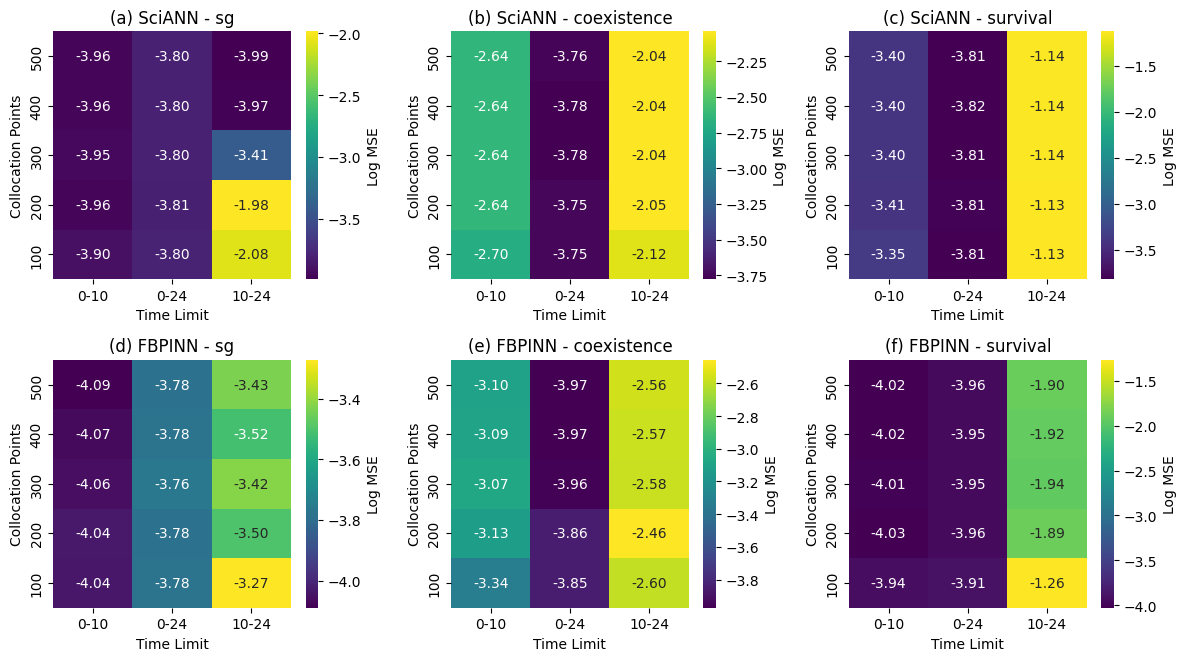

In [3]:
# make a 3x2 grid of subplots
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 3, figsize=(12, 7))
merged_df['MSE Learned'] = pd.to_numeric(merged_df['MSE Learned'], errors='coerce')
merged_df['MSE Test'] = pd.to_numeric(merged_df['MSE Test'], errors='coerce')

# Define the tags and model types
tags = ['SciANN', 'FBPINN']
model_types = ['sg', 'coexistence', 'survival']
time_limits = ['0-10', '10-24', '0-24']
fig_tag = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

# Loop through each tag and model type to create the pivot plot
for i, tag in enumerate(tags):
    for j, model_type in enumerate(model_types):
        # Filter the dataframe
        df_filtered = merged_df[(merged_df['Tag'] == tag) & (merged_df['Model Type'] == model_type)]
        
        # # Create a pivot table
        pivot_test = df_filtered.pivot(index="Collocation Points", columns="Time Limit", values="MSE Test")
        pivot_test_log = pivot_test.map(lambda x: np.log10(x + 1e-10))
        
        # Plot the heatmap
        sns.heatmap(pivot_test_log, annot=True, fmt=".2f", cmap='viridis',  cbar_kws={'label': 'Log MSE'}, ax=axes[i, j])
        
        # Set titles and labels
        axes[i, j].set_title(f'{fig_tag[i*3+j]} {tag} - {model_type}')
        axes[i, j].set_xlabel('Time Limit')
        axes[i, j].set_ylabel('Collocation Points')
        axes[i, j].invert_yaxis()
        axes[i, j].tick_params(axis='y', rotation=90)

plt.tight_layout(rect=[0, 0, 1, 0.96])
# save the plot
plt.savefig('MSE_heatmap_SciANN_Vs_FBPINN_CollocationPoints.png')
